In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the data

In [2]:
df = pd.read_csv('spambase.csv')

df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [3]:
df.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [4]:
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

### Splitting the data

In [5]:
x = df.values[:, :-1]
y = df.values[:, -1]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [7]:
print('x train shape:', x_train.shape)
print('x test shape:', x_test.shape)
print('y train shape:', y_train.shape)
print('y test shape:', y_test.shape)

x train shape: (3450, 57)
x test shape: (1151, 57)
y train shape: (3450,)
y test shape: (1151,)


### Model Choice

In [8]:
score = lambda model, x_test, y_test: pd.Series([model.score(x_test, y_test), 
                                                 model.score(x_test[y_test==0], y_test[y_test==0]),
                                                 model.score(x_test[y_test==1], y_test[y_test==1])], 
                                                index=['overall accuracy', 'accuracy on not spam', 'accuracy on spam'])

In [9]:
#c is the inverse regularization parameter (controls/reduce overfitting of the model)
Cs = 10.**np.arange(-3, 4, 1)
scores = []
for C in Cs:
    print('C:', C)
    weighted_log_scores = np.array([0., 0., 0.])
    kf = KFold(n_splits=10)
    kf.get_n_splits(len(x_train))
    for train_index, test_index in kf.split(x_train):
        x_validate_train, x_validate_test = x_train[train_index], x_train[test_index]
        y_validate_train, y_validate_test = y_train[train_index], y_train[test_index]

        weighted_logistic = LogisticRegression(C=C, class_weight='balanced', max_iter = 5000)
        weighted_logistic.fit(x_validate_train, y_validate_train)

        weighted_log_scores += score(weighted_logistic, x_validate_test, y_validate_test).values

    scores.append(weighted_log_scores / 10.)

scores = pd.DataFrame(np.array(scores).T, columns=[str(C) for C in Cs], index=['overall accuracy', 'accuracy on not Spam', 'accuracy on Spam'])

C: 0.001
C: 0.01
C: 0.1
C: 1.0
C: 10.0
C: 100.0


C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=

C: 1000.0


C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=

In [10]:
scores

,0.001,0.01,0.1,1.0,10.0,100.0,1000.0
overall accuracy,0.850145,0.901739,0.925797,0.931594,0.932754,0.930725,0.930435
accuracy on not Spam,0.874472,0.909297,0.931303,0.935144,0.936928,0.935104,0.935056
accuracy on Spam,0.813352,0.890092,0.917320,0.926300,0.926510,0.924063,0.923257


In [67]:
# Do not run

#KNN hyperparameters
leaf_size = list(range(1,20))
n_neighbors = list(range(1,10))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
print("hyperparameters")

#Create new KNN object
knn_2 = KNN()
print("knn2")

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
print("clf")

#Fit the model
knn_best_model = clf.fit(x_train,y_train)
print("knnbestfitmodel")

#Print The value of best Hyperparameters
print('Best leaf_size:', knn_best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', knn_best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', knn_best_model.best_estimator_.get_params()['n_neighbors'])

hyperparameters
knn2
clf
knnbestfitmodel
Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [18]:
#KNN
knn = KNN(n_neighbors=1)
knn.fit(x_train, y_train)

knn_scores = score(knn, x_train, y_train)
# knn_scores = score(knn_best_model, x_train, y_train)
print('knn')
# print(knn_scores)


#Unweighted logistic regression
unweighted_logistic = LogisticRegression(C=10)
unweighted_logistic.fit(x_train, y_train)

unweighted_log_scores = score(unweighted_logistic, x_train, y_train)
print('unweighted log')
# print(unweighted_log_scores)


#Weighted logistic regression
weighted_logistic = LogisticRegression(C=100, class_weight='balanced')
weighted_logistic.fit(x_train, y_train)

weighted_log_scores = score(weighted_logistic, x_train, y_train)
print('weighted log')


#Decision Tree
tree = DecisionTree(max_depth=50, class_weight='balanced', criterion='entropy', min_samples_split=8, min_samples_leaf=2)
tree.fit(x_train, y_train)

tree_scores = score(tree, x_train, y_train)
print('tree')
# print(tree_scores)

knn


C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


unweighted log
weighted log
tree


C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
#Score Dataframe
score_df = pd.DataFrame({'knn': knn_scores, 
                         'weighted logistic' : weighted_log_scores,
                         'unweighted logistic': unweighted_log_scores,
                         'tree': tree_scores})
score_df

,knn,weighted logistic,unweighted logistic,tree
overall accuracy,1.0,0.919710,0.922029,0.982319
accuracy on not spam,1.0,0.923224,0.937530,0.975680
accuracy on spam,1.0,0.914265,0.898004,0.992609


### Testing the model

In [13]:
#KNN
knn_scores_test = score(knn, x_test, y_test)
print('knn')

#Unweighted logistic regression
unweighted_log_scores_test = score(unweighted_logistic, x_test, y_test)
print('unweighted log')

#Unweighted logistic regression
weighted_log_scores_test = score(weighted_logistic, x_test, y_test)
print('weighted log')

#Decision Tree
tree_scores_test = score(tree, x_test, y_test)
print('tree')

knn
unweighted log
weighted log
tree


In [14]:
#Score Dataframe
score_df_test = pd.DataFrame({'knn test': knn_scores_test, 
                         'weighted logistic test': weighted_log_scores_test,     
                         'unweighted logistic test': unweighted_log_scores_test,
                         'tree test': tree_scores_test})
score_df_test

,knn test,weighted logistic test,unweighted logistic test,tree test
overall accuracy,0.816681,0.908775,0.915725,0.909644
accuracy on not spam,0.865412,0.914616,0.933430,0.910275
accuracy on spam,0.743478,0.900000,0.889130,0.908696


### From this we can conclude that we can take decission tree model to identify spam or not spam email

In [153]:
#best
unweighted_logistic = LogisticRegression(C=0.1, class_weight='balanced')
unweighted_logistic.fit(x_train, y_train)

unweighted_log_scores = score(unweighted_logistic, x_train, y_train)
print(unweighted_log_scores)
print()
unweighted_log_scores_test = score(unweighted_logistic, x_test, y_test)
print(unweighted_log_scores_test)

overall accuracy        0.926957
accuracy on not spam    0.930377
accuracy on spam        0.921656
dtype: float64

overall accuracy        0.908775
accuracy on not spam    0.913169
accuracy on spam        0.902174
dtype: float64


C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### From the above can conclude that we can take weighted logistic regression model to identify spam or not spam email

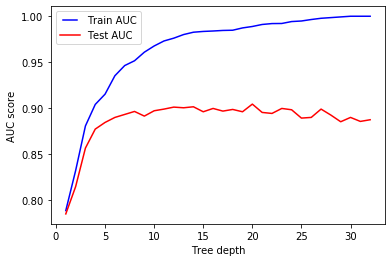

In [79]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTree(max_depth=max_depth)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

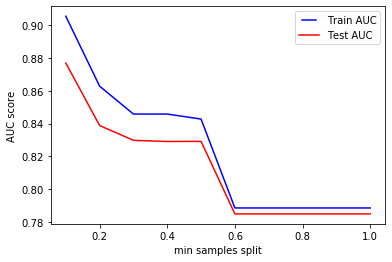

In [81]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTree(min_samples_split=min_samples_split)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

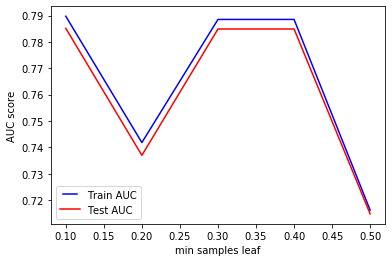

In [118]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTree(min_samples_leaf=min_samples_leaf)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

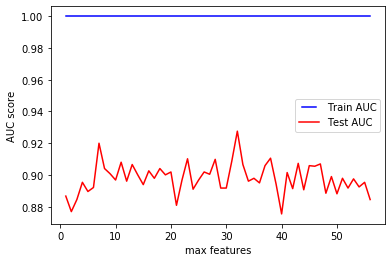

In [128]:
max_features = list(range(1,x_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTree(max_features=max_feature)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [138]:
unweighted_logistic = LogisticRegression(C=0.001)
unweighted_logistic.fit(x_train, y_train)

unweighted_log_scores = score(unweighted_logistic, x_train, y_train)
print(unweighted_log_scores)
print()
unweighted_log_scores_test = score(unweighted_logistic, x_test, y_test)
print(unweighted_log_scores_test)

overall accuracy        0.830145
accuracy on not spam    0.941822
accuracy on spam        0.657058
dtype: float64

overall accuracy        0.814944
accuracy on not spam    0.940666
accuracy on spam        0.626087
dtype: float64


C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [139]:
unweighted_logistic = LogisticRegression(C=0.01)
unweighted_logistic.fit(x_train, y_train)

unweighted_log_scores = score(unweighted_logistic, x_train, y_train)
print(unweighted_log_scores)
print()
unweighted_log_scores_test = score(unweighted_logistic, x_test, y_test)
print(unweighted_log_scores_test)

overall accuracy        0.902609
accuracy on not spam    0.943729
accuracy on spam        0.838877
dtype: float64

overall accuracy        0.882711
accuracy on not spam    0.929088
accuracy on spam        0.813043
dtype: float64


C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [140]:
unweighted_logistic = LogisticRegression(C=0.1)
unweighted_logistic.fit(x_train, y_train)

unweighted_log_scores = score(unweighted_logistic, x_train, y_train)
print(unweighted_log_scores)
print()
unweighted_log_scores_test = score(unweighted_logistic, x_test, y_test)
print(unweighted_log_scores_test)

overall accuracy        0.921449
accuracy on not spam    0.941822
accuracy on spam        0.889874
dtype: float64

overall accuracy        0.913988
accuracy on not spam    0.937771
accuracy on spam        0.878261
dtype: float64


C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [141]:
unweighted_logistic = LogisticRegression(C=1)
unweighted_logistic.fit(x_train, y_train)

unweighted_log_scores = score(unweighted_logistic, x_train, y_train)
print(unweighted_log_scores)
print()
unweighted_log_scores_test = score(unweighted_logistic, x_test, y_test)
print(unweighted_log_scores_test)

overall accuracy        0.922899
accuracy on not spam    0.939914
accuracy on spam        0.896526
dtype: float64

overall accuracy        0.915725
accuracy on not spam    0.934877
accuracy on spam        0.886957
dtype: float64


C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [142]:
unweighted_logistic = LogisticRegression(C=10)
unweighted_logistic.fit(x_train, y_train)

unweighted_log_scores = score(unweighted_logistic, x_train, y_train)
print(unweighted_log_scores)
print()
unweighted_log_scores_test = score(unweighted_logistic, x_test, y_test)
print(unweighted_log_scores_test)

overall accuracy        0.922029
accuracy on not spam    0.937530
accuracy on spam        0.898004
dtype: float64

overall accuracy        0.915725
accuracy on not spam    0.933430
accuracy on spam        0.889130
dtype: float64


C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [143]:
unweighted_logistic = LogisticRegression(C=100)
unweighted_logistic.fit(x_train, y_train)

unweighted_log_scores = score(unweighted_logistic, x_train, y_train)
print(unweighted_log_scores)
print()
unweighted_log_scores_test = score(unweighted_logistic, x_test, y_test)
print(unweighted_log_scores_test)

overall accuracy        0.921159
accuracy on not spam    0.933238
accuracy on spam        0.902439
dtype: float64

overall accuracy        0.915725
accuracy on not spam    0.931983
accuracy on spam        0.891304
dtype: float64


C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [144]:
unweighted_logistic = LogisticRegression(C=1000)
unweighted_logistic.fit(x_train, y_train)

unweighted_log_scores = score(unweighted_logistic, x_train, y_train)
print(unweighted_log_scores)
print()
unweighted_log_scores_test = score(unweighted_logistic, x_test, y_test)
print(unweighted_log_scores_test)

overall accuracy        0.927826
accuracy on not spam    0.949928
accuracy on spam        0.893570
dtype: float64

overall accuracy        0.905300
accuracy on not spam    0.930535
accuracy on spam        0.867391
dtype: float64


C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [145]:
unweighted_logistic = LogisticRegression(C=0.001, class_weight='balanced')
unweighted_logistic.fit(x_train, y_train)

unweighted_log_scores = score(unweighted_logistic, x_train, y_train)
print(unweighted_log_scores)
print()
unweighted_log_scores_test = score(unweighted_logistic, x_test, y_test)
print(unweighted_log_scores_test)

overall accuracy        0.854203
accuracy on not spam    0.864092
accuracy on spam        0.838877
dtype: float64

overall accuracy        0.862728
accuracy on not spam    0.890014
accuracy on spam        0.821739
dtype: float64


C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [146]:
unweighted_logistic = LogisticRegression(C=0.01, class_weight='balanced')
unweighted_logistic.fit(x_train, y_train)

unweighted_log_scores = score(unweighted_logistic, x_train, y_train)
print(unweighted_log_scores)
print()
unweighted_log_scores_test = score(unweighted_logistic, x_test, y_test)
print(unweighted_log_scores_test)

overall accuracy        0.905797
accuracy on not spam    0.902718
accuracy on spam        0.910569
dtype: float64

overall accuracy        0.895743
accuracy on not spam    0.895803
accuracy on spam        0.895652
dtype: float64


C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [147]:
#best
unweighted_logistic = LogisticRegression(C=0.1, class_weight='balanced')
unweighted_logistic.fit(x_train, y_train)

unweighted_log_scores = score(unweighted_logistic, x_train, y_train)
print(unweighted_log_scores)
print()
unweighted_log_scores_test = score(unweighted_logistic, x_test, y_test)
print(unweighted_log_scores_test)

overall accuracy        0.926957
accuracy on not spam    0.930377
accuracy on spam        0.921656
dtype: float64

overall accuracy        0.908775
accuracy on not spam    0.913169
accuracy on spam        0.902174
dtype: float64


C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [148]:
unweighted_logistic = LogisticRegression(C=1, class_weight='balanced')
unweighted_logistic.fit(x_train, y_train)

unweighted_log_scores = score(unweighted_logistic, x_train, y_train)
print(unweighted_log_scores)
print()
unweighted_log_scores_test = score(unweighted_logistic, x_test, y_test)
print(unweighted_log_scores_test)

overall accuracy        0.922319
accuracy on not spam    0.924177
accuracy on spam        0.919438
dtype: float64

overall accuracy        0.908775
accuracy on not spam    0.914616
accuracy on spam        0.900000
dtype: float64


C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [149]:
unweighted_logistic = LogisticRegression(C=10, class_weight='balanced')
unweighted_logistic.fit(x_train, y_train)

unweighted_log_scores = score(unweighted_logistic, x_train, y_train)
print(unweighted_log_scores)
print()
unweighted_log_scores_test = score(unweighted_logistic, x_test, y_test)
print(unweighted_log_scores_test)

overall accuracy        0.919420
accuracy on not spam    0.920362
accuracy on spam        0.917960
dtype: float64

overall accuracy        0.908775
accuracy on not spam    0.916064
accuracy on spam        0.897826
dtype: float64


C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [150]:
unweighted_logistic = LogisticRegression(C=100, class_weight='balanced')
unweighted_logistic.fit(x_train, y_train)

unweighted_log_scores = score(unweighted_logistic, x_train, y_train)
print(unweighted_log_scores)
print()
unweighted_log_scores_test = score(unweighted_logistic, x_test, y_test)
print(unweighted_log_scores_test)

overall accuracy        0.919710
accuracy on not spam    0.923224
accuracy on spam        0.914265
dtype: float64

overall accuracy        0.908775
accuracy on not spam    0.914616
accuracy on spam        0.900000
dtype: float64


C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [151]:
unweighted_logistic = LogisticRegression(C=1000, class_weight='balanced')
unweighted_logistic.fit(x_train, y_train)

unweighted_log_scores = score(unweighted_logistic, x_train, y_train)
print(unweighted_log_scores)
print()
unweighted_log_scores_test = score(unweighted_logistic, x_test, y_test)
print(unweighted_log_scores_test)

overall accuracy        0.921739
accuracy on not spam    0.929900
accuracy on spam        0.909091
dtype: float64

overall accuracy        0.910513
accuracy on not spam    0.920405
accuracy on spam        0.895652
dtype: float64


C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
